In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
# Mengatur gaya visualisasi agar lebih rapi
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [10]:
# 1. Load Dataset
# Pastikan file CSV sudah diupload ke Colab jika menggunakan Google Colab
df = pd.read_csv('btcusd_1-min_data.csv')

# 2. Konversi Timestamp
# Dataset ini menggunakan detik (Unix), kita ubah ke Datetime index
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')
df.set_index('Timestamp', inplace=True)

# 3. Handling Missing Values (Gunakan kolom 'Close' karena 'Weighted_Price' tidak ada)
print("Jumlah data kosong pada kolom Close:", df['Close'].isnull().sum())

# Mengisi harga yang kosong dengan harga terakhir yang tersedia (Forward Fill)
# Sangat umum di data keuangan agar tidak ada gap pada grafik
df['Close'] = df['Close'].fillna(method='ffill')

# 4. Resampling ke Harian (Daily)
# Karena data per menit terlalu berat, kita ambil rata-rata harga penutupan harian
df_daily = df['Close'].resample('D').mean()

# Hapus jika masih ada NaN di awal-awal data historis
df_daily = df_daily.dropna()

print("Berhasil! Data harian siap digunakan.")
print(df_daily.head())

Jumlah data kosong pada kolom Close: 0


C:\Users\asus\AppData\Local\Temp\ipykernel_16532\2839103553.py:15: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Close'] = df['Close'].fillna(method='ffill')


Berhasil! Data harian siap digunakan.
Timestamp
2012-01-01    4.645697
2012-01-02    4.975000
2012-01-03    5.085500
2012-01-04    5.170396
2012-01-05    5.954361
Freq: D, Name: Close, dtype: float64


C:\Users\asus\AppData\Local\Temp\ipykernel_16532\2101271384.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df_daily.resample('M').mean()


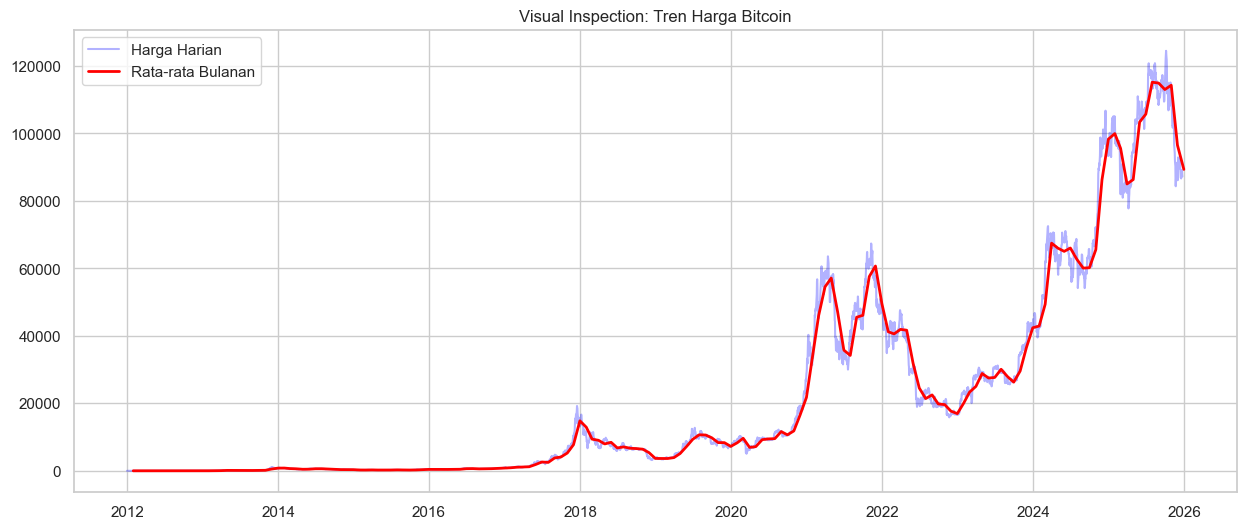

In [11]:
plt.figure(figsize=(15, 6))

# Plot Data Harian (Transparan)
plt.plot(df_daily, label='Harga Harian', alpha=0.3, color='blue')

# Plot Data Bulanan (Tebal)
df_monthly = df_daily.resample('M').mean()
plt.plot(df_monthly, label='Rata-rata Bulanan', color='red', linewidth=2)

plt.title('Visual Inspection: Tren Harga Bitcoin')
plt.legend()
plt.show()

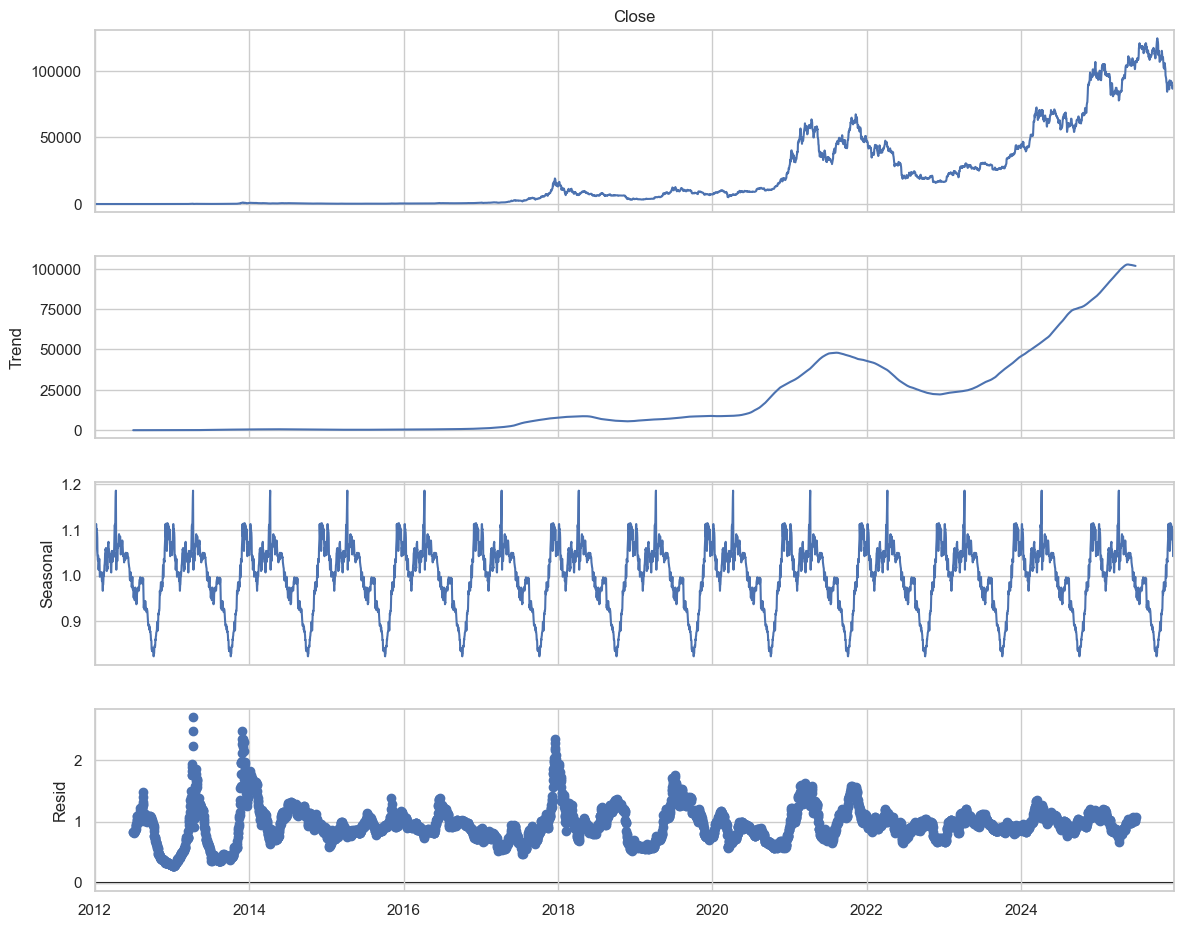

In [12]:
# Dekomposisi dengan periode 365 hari (siklus tahunan)
decomp = seasonal_decompose(df_daily, model='multiplicative', period=365)

fig = decomp.plot()
fig.set_size_inches(12, 10)
plt.show()

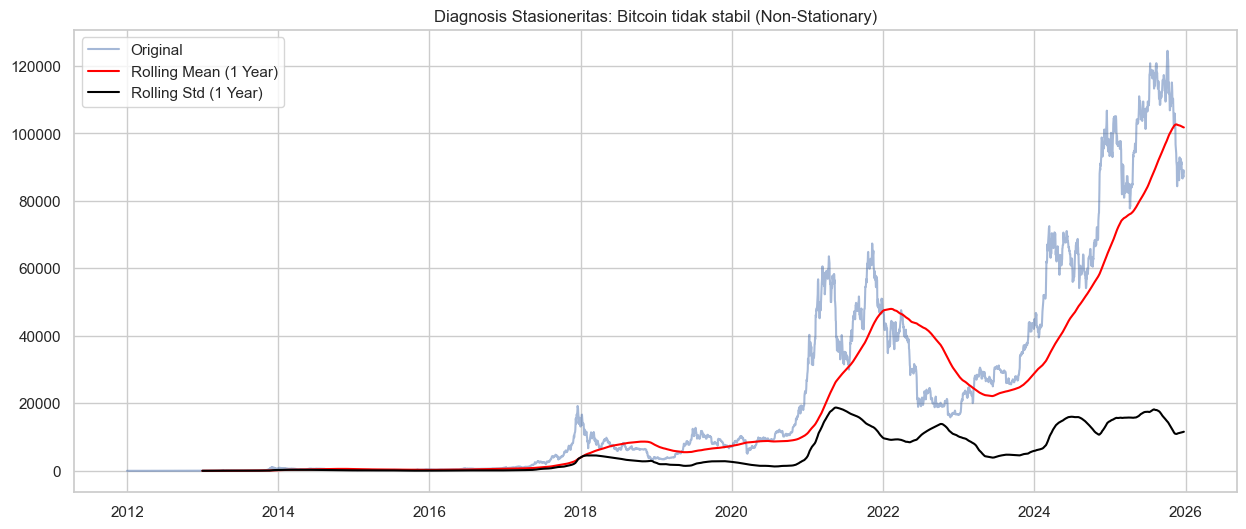

File bitcoin_cleaned.csv telah disimpan untuk keperluan deploy web.


In [13]:
# Hitung Rolling Mean & Std (Window 1 tahun)
rolmean = df_daily.rolling(window=365).mean()
rolstd = df_daily.rolling(window=365).std()

plt.figure(figsize=(15, 6))
plt.plot(df_daily, label='Original', alpha=0.5)
plt.plot(rolmean, label='Rolling Mean (1 Year)', color='red')
plt.plot(rolstd, label='Rolling Std (1 Year)', color='black')

plt.title('Diagnosis Stasioneritas: Bitcoin tidak stabil (Non-Stationary)')
plt.legend()
plt.show()

# Simpan untuk aplikasi deploy nanti
df_daily.to_csv('bitcoin_cleaned.csv')
print("File bitcoin_cleaned.csv telah disimpan untuk keperluan deploy web.")